In [152]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [153]:
loan=pd.read_csv("C:/Users/dell/Desktop/ml-projects/loan-eligibity-prediction/loan-train.csv")

In [154]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
loan["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [156]:
def s(i):
    if i=="3+":
        return 3
    elif i=="1":
        return 1
    elif i=="2":
        return 2
    elif i=="0":
        return 0
    else:
        return i
    

In [157]:
loan["Dependents"]=loan["Dependents"].apply(s)

In [158]:
loan["Dependents"].value_counts()

Dependents
0.0    345
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64

In [159]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


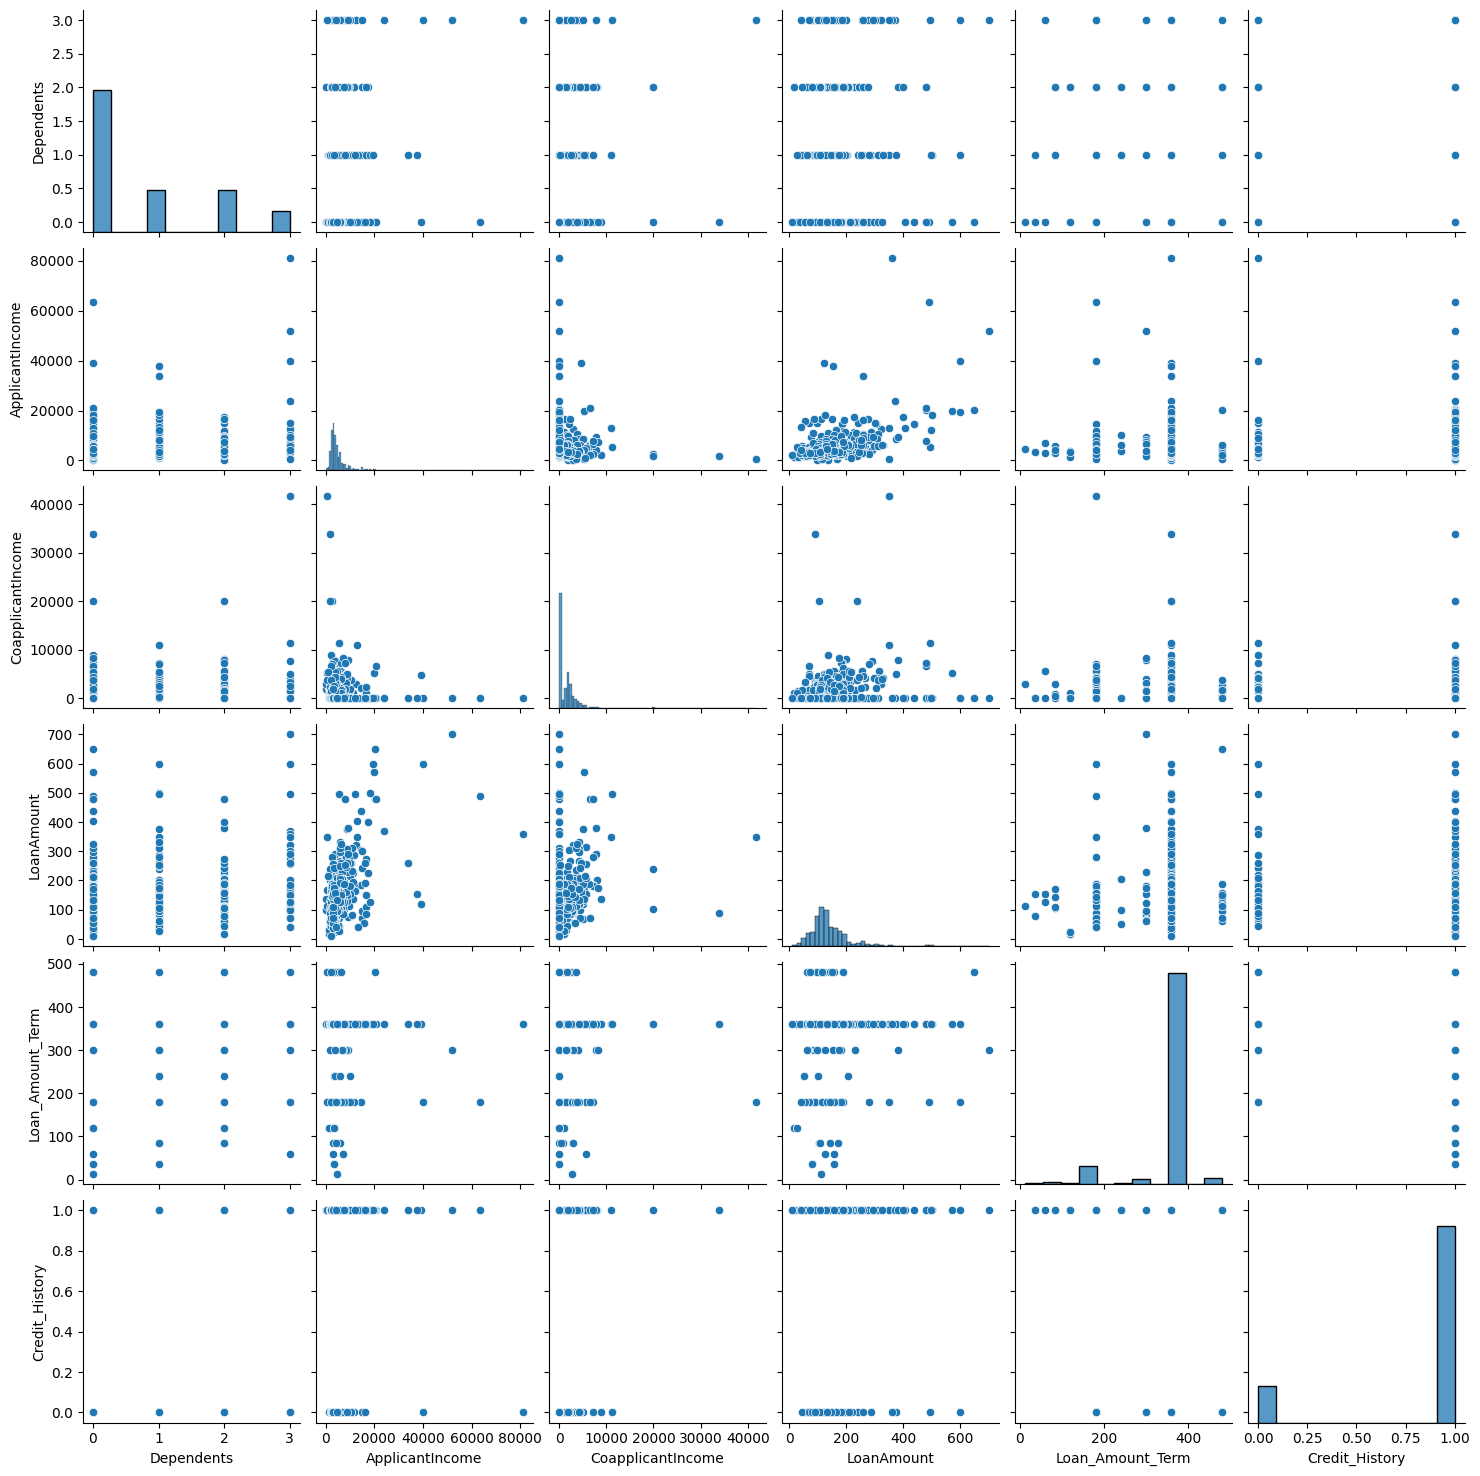

In [160]:
sns.pairplot(data=loan)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

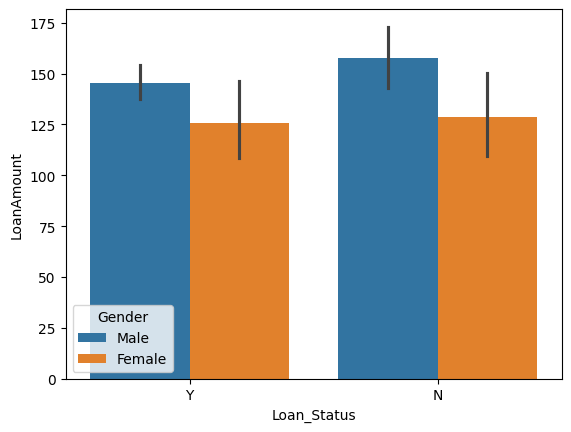

In [161]:
sns.barplot(x=loan["Loan_Status"],y=loan["LoanAmount"],hue=loan["Gender"])

In [162]:
from sklearn.compose import ColumnTransformer

In [163]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [164]:
loan.drop(columns=["Loan_ID"],inplace=True)

In [165]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [166]:
from sklearn.impute import SimpleImputer

In [167]:
trf1=ColumnTransformer([
    ("imputer",SimpleImputer(strategy="most_frequent"),[0,1,2]),
    ('education',"passthrough",[3]),
    ("impute_self_employed",SimpleImputer(strategy="most_frequent"),[4]),
    ("pass","passthrough",[5,6]),
    ("impute",SimpleImputer(strategy="most_frequent"),[7,8,9])
],remainder="passthrough")

In [168]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [169]:
y=loan[["Loan_Status"]]
loan.drop(columns=["Loan_Status"],inplace=True)

In [170]:
x1=trf1.fit_transform(loan)

In [171]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
trf2=ColumnTransformer([
    ("ohe_sex",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[0,1]),
    ("pass","passthrough",[2]),
    ("ohe_graduate_se",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[3,4]),
    ("pass2","passthrough",[5,6,7,8,9]),
    ("ohe_ProArea",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[10])
],remainder="passthrough")

In [173]:
X=trf2.fit_transform(x1)

In [174]:
X

array([[0.0, 1.0, 1.0, ..., 0.0, 0.0, 1.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 1.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 1.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 1.0],
       [1.0, 0.0, 1.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
le=LabelEncoder()

In [177]:
y=le.fit_transform(y)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [179]:
from sklearn.metrics import accuracy_score

In [180]:
accuracy_score(y_pred,y_test)

0.7886178861788617

In [181]:
from sklearn.model_selection  import GridSearchCV

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
adc=AdaBoostClassifier(n_estimators=500,learning_rate=0.01,algorithm="SAMME.R")

In [184]:
adc.fit(X_train,y_train)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.01, n_estimators=500)

In [185]:
y_pred=adc.predict(X_test)

In [186]:
accuracy_score(y_pred,y_test)

0.7886178861788617

In [187]:
n_estimators=[50,100,200,500]
learning_rate=[0.001,0.01,0.1,1.0]



In [188]:
grid={
    "n_estimators":n_estimators,
    "learning_rate":learning_rate
}

In [189]:
grid_estimator=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,cv=5,scoring="accuracy",n_jobs=-1)

In [190]:
grid_estimator.fit(X_train,y_train)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [191]:
best_estimator=grid_estimator.best_estimator_

In [192]:
y_pred=best_estimator.predict(X_test)

In [193]:
accuracy_score(y_pred,y_test)

0.7886178861788617